In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## Project Description
The World Happiness Report is a landmark survey of the state of global happiness. The first report was published in 2012, the second in 2013, the third in 2015, and the fourth in the 2016 Update. The World Happiness 2017, which ranks 155 countries by their happiness levels, was released at the United Nations at an event celebrating International Day of Happiness on March 20th. The report continues to gain global recognition as governments, organizations and civil society increasingly use happiness indicators to inform their policy-making decisions. Leading experts across fields – economics, psychology, survey analysis, national statistics, health, public policy and more – describe how measurements of well-being can be used effectively to assess the progress of nations. The reports review the state of happiness in the world today and show how the new science of happiness explains personal and national variations in happiness.

In [2]:
# Read the dataset
df=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/DSData/master/happiness_score_dataset.csv')
df.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [3]:
df.tail()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
153,Rwanda,Sub-Saharan Africa,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,Benin,Sub-Saharan Africa,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,Syria,Middle East and Northern Africa,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,Burundi,Sub-Saharan Africa,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302
157,Togo,Sub-Saharan Africa,158,2.839,0.06727,0.20868,0.13995,0.28443,0.36453,0.10731,0.16681,1.56726


## EDA

In [4]:
df.shape

(158, 12)

In [5]:
# so we have 158 rows and 12 columns

In [8]:
df.columns

Index(['Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Standard Error', 'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity', 'Dystopia Residual'],
      dtype='object')

In [9]:
# we have 12 columns in which happiness score is our target variable

In [10]:
df.dtypes

Country                           object
Region                            object
Happiness Rank                     int64
Happiness Score                  float64
Standard Error                   float64
Economy (GDP per Capita)         float64
Family                           float64
Health (Life Expectancy)         float64
Freedom                          float64
Trust (Government Corruption)    float64
Generosity                       float64
Dystopia Residual                float64
dtype: object

In [11]:
# so we have 2 columns of object data type and rest are numberical data type

In [12]:
# check for null values
df.isnull().sum()

Country                          0
Region                           0
Happiness Rank                   0
Happiness Score                  0
Standard Error                   0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
dtype: int64

In [13]:
# We can see that there is no null value present in the datset

In [14]:
df.isnull().sum().sum()

0

In [15]:
# check the info of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        158 non-null    object 
 1   Region                         158 non-null    object 
 2   Happiness Rank                 158 non-null    int64  
 3   Happiness Score                158 non-null    float64
 4   Standard Error                 158 non-null    float64
 5   Economy (GDP per Capita)       158 non-null    float64
 6   Family                         158 non-null    float64
 7   Health (Life Expectancy)       158 non-null    float64
 8   Freedom                        158 non-null    float64
 9   Trust (Government Corruption)  158 non-null    float64
 10  Generosity                     158 non-null    float64
 11  Dystopia Residual              158 non-null    float64
dtypes: float64(9), int64(1), object(2)
memory usage: 1

In [22]:
# check the statistical value of dataset
df.describe()

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,79.493671,5.375734,0.047885,0.846137,0.991046,0.630259,0.428615,0.143422,0.237296,2.098977
std,45.754363,1.145010,0.017146,0.403121,0.272369,0.247078,0.150693,0.120034,0.126685,0.553550
min,1.000000,2.839000,0.018480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580
25%,40.250000,4.526000,0.037268,0.545808,0.856823,0.439185,0.328330,0.061675,0.150553,1.759410
50%,79.500000,5.232500,0.043940,0.910245,1.029510,0.696705,0.435515,0.107220,0.216130,2.095415
75%,118.750000,6.243750,0.052300,1.158448,1.214405,0.811013,0.549092,0.180255,0.309883,2.462415
max,158.000000,7.587000,0.136930,1.690420,1.402230,1.025250,0.669730,0.551910,0.795880,3.602140


In [23]:
# Check the unique value in the dataset

for i in df.columns:
    print('column name', i)
    print('Number of unique value:', df[i].nunique())
    print('\n')

column name Country
Number of unique value: 158


column name Region
Number of unique value: 10


column name Happiness Rank
Number of unique value: 157


column name Happiness Score
Number of unique value: 157


column name Standard Error
Number of unique value: 153


column name Economy (GDP per Capita)
Number of unique value: 158


column name Family
Number of unique value: 158


column name Health (Life Expectancy)
Number of unique value: 157


column name Freedom
Number of unique value: 158


column name Trust (Government Corruption)
Number of unique value: 157


column name Generosity
Number of unique value: 158


column name Dystopia Residual
Number of unique value: 158




In [24]:
# so we can see only the region column has only 10 unique values and rest has almost every unique value in the dataset
# our target column has 157 unique value means this regression problem.

## Graphical analysis

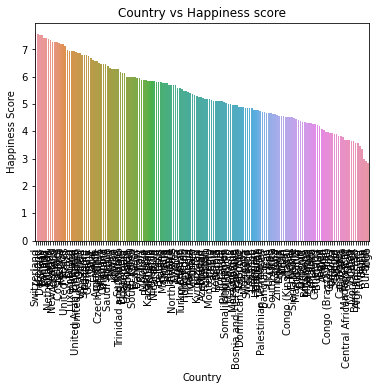

In [29]:
# Check for country and happiness score
plt.title('Country vs Happiness score')
sns.barplot(x='Country', y='Happiness Score', data=df)
plt.xticks(rotation=90)
plt.show()

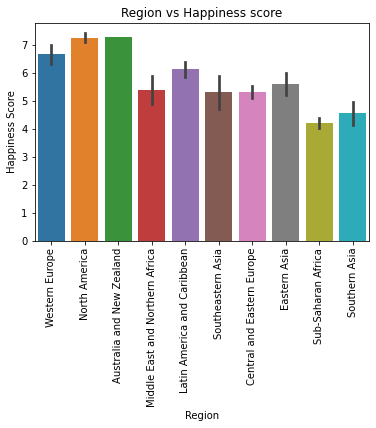

In [31]:
# check for region and happiness score
plt.title('Region vs Happiness score')
sns.barplot(x='Region', y='Happiness Score', data=df)
plt.xticks(rotation=90)
plt.show()

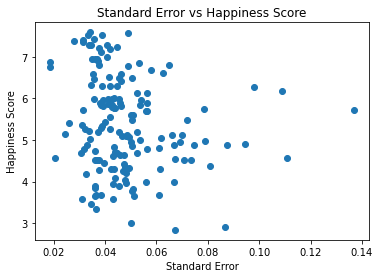

In [38]:
# check for Standard error and happiness score
plt.scatter(df['Standard Error'], df['Happiness Score'])
plt.title('Standard Error vs Happiness Score')
plt.xlabel('Standard Error')
plt.ylabel('Happiness Score')
plt.show()

In [39]:
# we can see that if standard error bwtween 0.004 and 0.08 happiness score is high

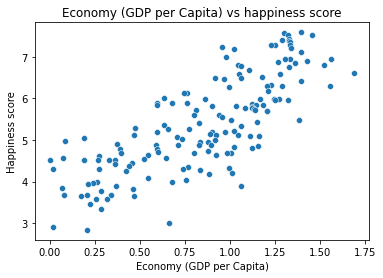

In [42]:
# check for economy vs happiness score
sns.scatterplot(df['Economy (GDP per Capita)'], df['Happiness Score'])
plt.title('Economy (GDP per Capita) vs happiness score')
plt.xlabel('Economy (GDP per Capita)')
plt.ylabel('Happiness score')
plt.show()

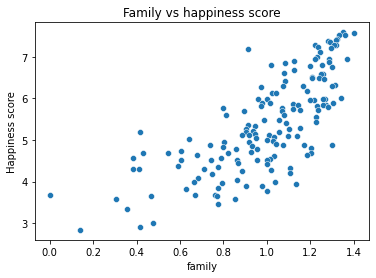

In [43]:
sns.scatterplot(df['Family'], df['Happiness Score'])
plt.title('Family vs happiness score')
plt.xlabel('family')
plt.ylabel('Happiness score')
plt.show()

In [44]:
#Family and happines score also has linear relation.

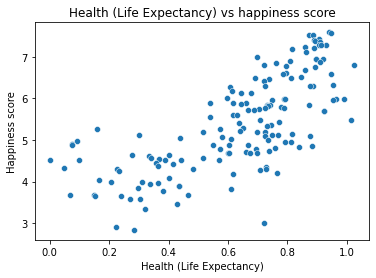

In [45]:
sns.scatterplot(df['Health (Life Expectancy)'], df['Happiness Score'])
plt.title('Health (Life Expectancy) vs happiness score')
plt.xlabel('Health (Life Expectancy)')
plt.ylabel('Happiness score')
plt.show()

In [46]:
# we can see Health (Life Expectancy) also has liner relation with happiness score

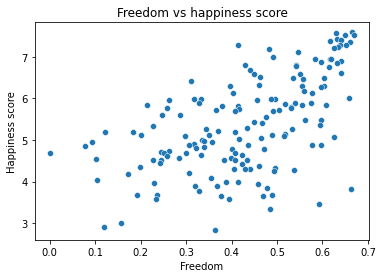

In [47]:
sns.scatterplot(df['Freedom'], df['Happiness Score'])
plt.title('Freedom vs happiness score')
plt.xlabel('Freedom')
plt.ylabel('Happiness score')
plt.show()

In [48]:
# Freedom also has linear relation with happiness score

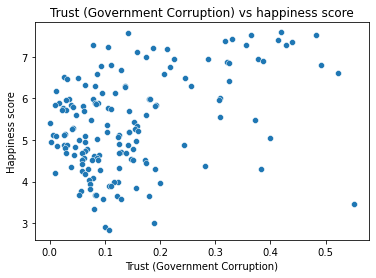

In [49]:
sns.scatterplot(df['Trust (Government Corruption)'], df['Happiness Score'])
plt.title('Trust (Government Corruption) vs happiness score')
plt.xlabel('Trust (Government Corruption)')
plt.ylabel('Happiness score')
plt.show()

In [50]:
# we can see there are very less number with corrruption is high and happiness score is also high

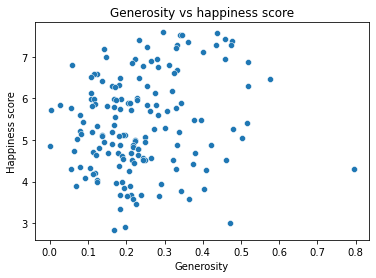

In [51]:
sns.scatterplot(df['Generosity'], df['Happiness Score'])
plt.title('Generosity vs happiness score')
plt.xlabel('Generosity')
plt.ylabel('Happiness score')
plt.show()

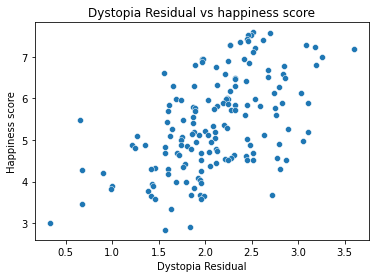

In [52]:
sns.scatterplot(df['Dystopia Residual'], df['Happiness Score'])
plt.title('Dystopia Residual vs happiness score')
plt.xlabel('Dystopia Residual')
plt.ylabel('Happiness score')
plt.show()

In [54]:
# shorting the numbric and object data type
number=[]
for i in df.dtypes.index:
    if df.dtypes[i]!='object':
        number.append(i)
print('Niumberic_col', number) 

print('\n')

category=[]
for i in df.dtypes.index:
    if df.dtypes[i]=='object':
        category.append(i)
print('Category_col', category)

Niumberic_col ['Happiness Rank', 'Happiness Score', 'Standard Error', 'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)', 'Generosity', 'Dystopia Residual']


Category_col ['Country', 'Region']


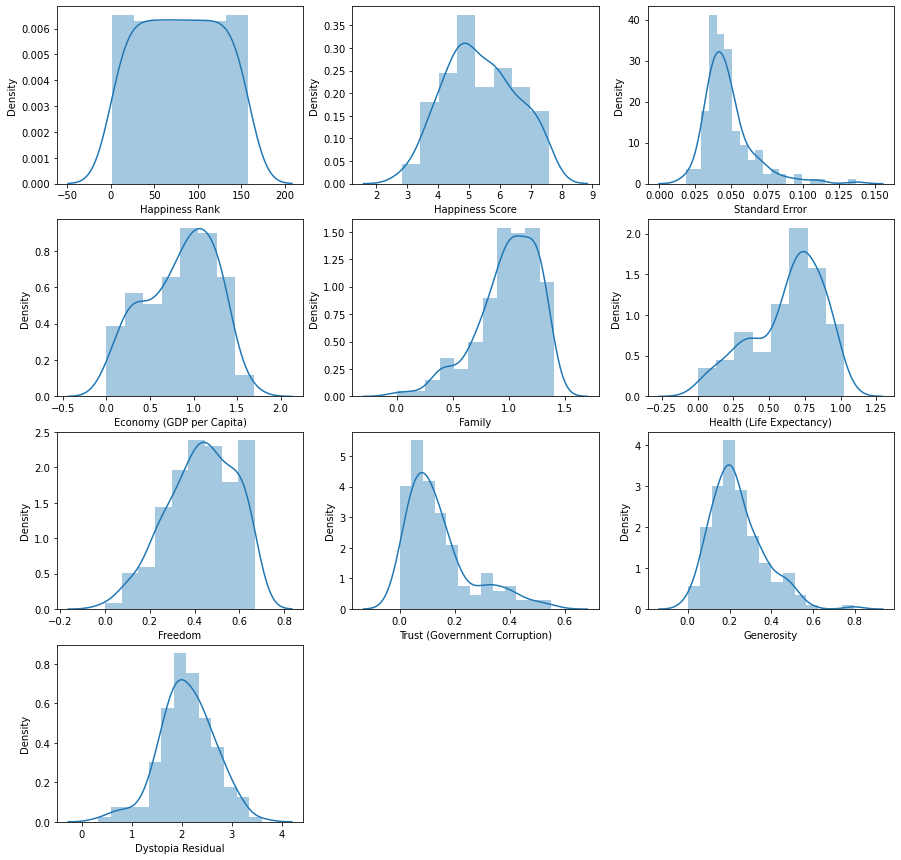

In [56]:
# check the distribution of the dataset

plt.figure(figsize=(15,15))
plotnumber=1

for i in number:
    if plotnumber<=20:
        axs=plt.subplot(4,3,plotnumber)
        sns.distplot(df[i])
        plt.xlabel(i, fontsize=10)
    plotnumber+=1
plt.show()

In [57]:
#We can see all the columns has normally distributed

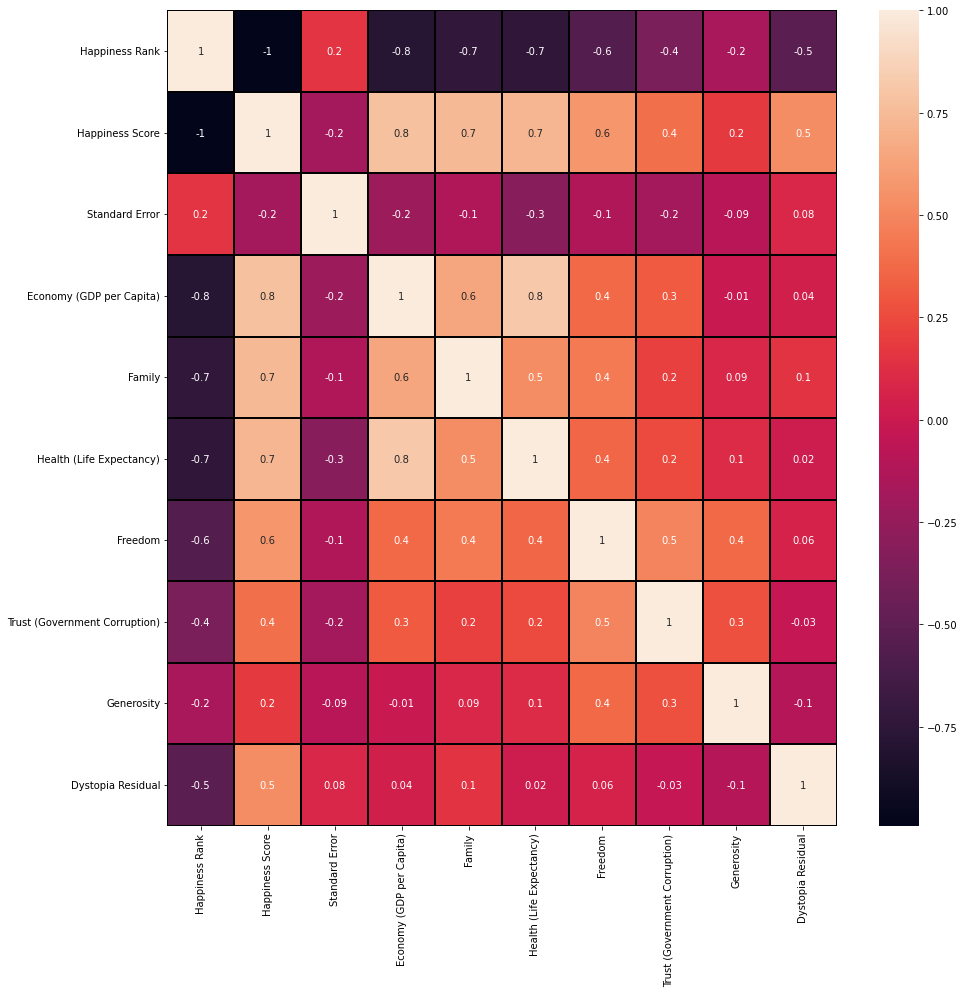

In [58]:
# check the correlation
cor=df.corr()
plt.figure(figsize=(15,15))
sns.heatmap(cor,annot=True,fmt='.1g', linewidths=0.1, linecolor='black')
plt.show()

In [60]:
# we will drop the country and region column beause it didnt contribute in happiness rank
df.drop('Country', axis=1, inplace=True )

In [61]:
df.drop('Region', axis=1, inplace=True )

In [62]:
df.head()

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [63]:
# we sucessfully drop the columns

In [64]:
# short the target feature
x=df.drop(columns=['Happiness Score'])
y=df['Happiness Score']

In [65]:
# Standardise the indenden features
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()

x=scaler.fit_transform(x)

## Model building

In [67]:
# Train Test split the datset
from sklearn.model_selection import train_test_split

In [71]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=42)

In [72]:
from sklearn.linear_model import LinearRegression 
LR=LinearRegression()
LR.fit(x_train,y_train)
pred_LR=LR.predict(x_test)

In [73]:
LR.score(x_train,y_train)

0.9999999396685151

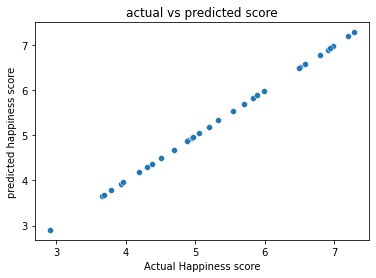

In [75]:
sns.scatterplot(y_test,pred_LR)
plt.xlabel('Actual Happiness score')
plt.ylabel('predicted happiness score')
plt.title('actual vs predicted score')
plt.show()

In [76]:
LR.score(x_test,y_test)

0.9999999476481373

In [77]:
from sklearn.ensemble import RandomForestRegressor

In [78]:
RFR=RandomForestRegressor()
RFR.fit(x_train,y_train)
RFR.score(x_train,y_train)

0.999231609147454

In [79]:
RFR_pred=RFR.predict(x_test)
RFR.score(x_test,y_test)

0.9977869300421112

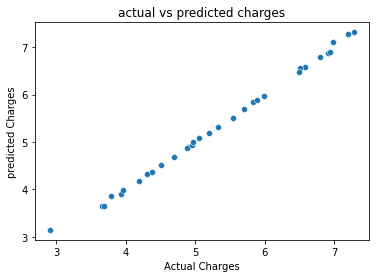

In [80]:
sns.scatterplot(y_test,RFR_pred)
plt.xlabel('Actual Charges')
plt.ylabel('predicted Charges')
plt.title('actual vs predicted charges')
plt.show()

In [81]:
# In both model we got 99% accuracy